поиск лучшего варианта расчета центра скопления точек (отражений от опоры)

In [21]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [3]:
%matplotlib inline

(0    POINT (9.28986 4.10145)
 dtype: geometry,
 0    POINT (7.56200 3.08118)
 dtype: geometry,
 0    POINT (7.58439 2.94903)
 dtype: geometry)

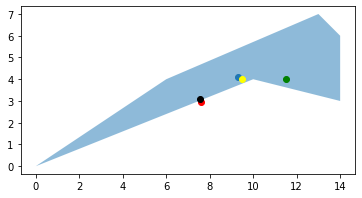

In [194]:
c2 = ([(0,0), (6,4), (13,7), (14,6), (14,3), (10,4)])
c2m = Point(np.mean(c2, axis=0))
c2a = Point(np.median(c2, axis=0))
polygon1 = Polygon(c2)
p = gpd.GeoSeries(polygon1)
cc = p.convex_hull
cc2 = cc.buffer(10)
cc3 = cc2.centroid
bu = p.buffer(10)
c1 = p.centroid
ax = p.plot(alpha=0.5)
c1.plot(ax=ax)
cc3.plot(ax=ax, color='red')
#bu.plot(ax=ax, alpha=0.5)
bu1 = bu.centroid
bu1.plot(ax=ax, color='black')
gpd.GeoSeries(c2m).plot(ax=ax, color='yellow')
gpd.GeoSeries(c2a).plot(ax=ax, color='green')
c1, bu1, cc3

вывод - стоит использовать буфер вокруг фигуры .buffer() или .convex_hull - описывающую фигуру + буфер вокруг нее. результат примерно одинаковый.  
учитывая что мы имеем дело с массивом точек, полигон по которым строится не пойми какой, желательно использовать .convex_hull, т.к. там идет упрощение фигуры.   
также имеет значение выбор размера буфера - он не должен быть больше самой фигуры, желательно половину от меньшей разницы по одной из осей